In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="thG33xUjGSCIzbllIF4X")
project = rf.workspace("diallo").project("food_isntance_segmentation_104")
version = project.version(1)
dataset = version.download("yolov11")
                

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.7 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Food_isntance_segmentation_104-1 in yolov11:: 100%|██████████| 14152/14152 [00:02<00:00, 6499.29it/s]


In [2]:
def write_yaml_file(text,file_path):
    with open(file_path,'w') as file:
        file.write(text)

text='''
names: ['French beans', 'almond', 'apple', 'apricot', 'asparagus', 'avocado', 'bamboo shoots', 'banana', 'bean sprouts', 'biscuit', 'blueberry', 'bread', 'broccoli', 'cabbage', 'cake', 'candy', 'carrot', 'cashew', 'cauliflower', 'celery stick', 'cheese butter', 'cherry', 'chicken duck', 'chocolate', 'cilantro mint', 'coffee', 'corn', 'crab', 'cucumber', 'date', 'dried cranberries', 'egg', 'egg tart', 'eggplant', 'enoki mushroom', 'fig', 'fish', 'french fries', 'fried meat', 'garlic', 'ginger', 'grape', 'green beans', 'hamburg', 'hanamaki baozi', 'ice cream', 'juice', 'kelp', 'king oyster mushroom', 'kiwi', 'lamb', 'lemon', 'lettuce', 'mango', 'melon', 'milk', 'milkshake', 'noodles', 'okra', 'olives', 'onion', 'orange', 'other ingredients', 'oyster mushroom', 'pasta', 'peach', 'peanut', 'pear', 'pepper', 'pie', 'pineapple', 'pizza', 'popcorn', 'pork', 'potato', 'pudding', 'pumpkin', 'rape', 'raspberry', 'red beans', 'rice', 'salad', 'sauce', 'sausage', 'seaweed', 'shellfish', 'shiitake', 'shrimp', 'snow peas', 'soup', 'soy', 'spring onion', 'steak', 'strawberry', 'tea', 'tofu', 'tomato', 'walnut', 'watermelon', 'white button mushroom', 'white radish', 'wine', 'wonton dumplings']

nc: 103

train: /kaggle/working/Food_isntance_segmentation_104-1/train/images
val: /kaggle/working/Food_isntance_segmentation_104-1/valid/images
test: /kaggle/working/Food_isntance_segmentation_104-1/test/images

'''        
write_yaml_file(text,"Data.yaml")

In [3]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.39 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


In [5]:
!yolo task= segment mode= train data=/kaggle/working/Data.yaml model=yolo11s-seg.pt epochs=20 imgsz=640 batch=16

100%|██████████████████████████████████████| 19.7M/19.7M [00:00<00:00, 64.0MB/s]
Ultralytics 8.3.39 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=/kaggle/working/Data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sa

In [6]:
from IPython.display import Image, display

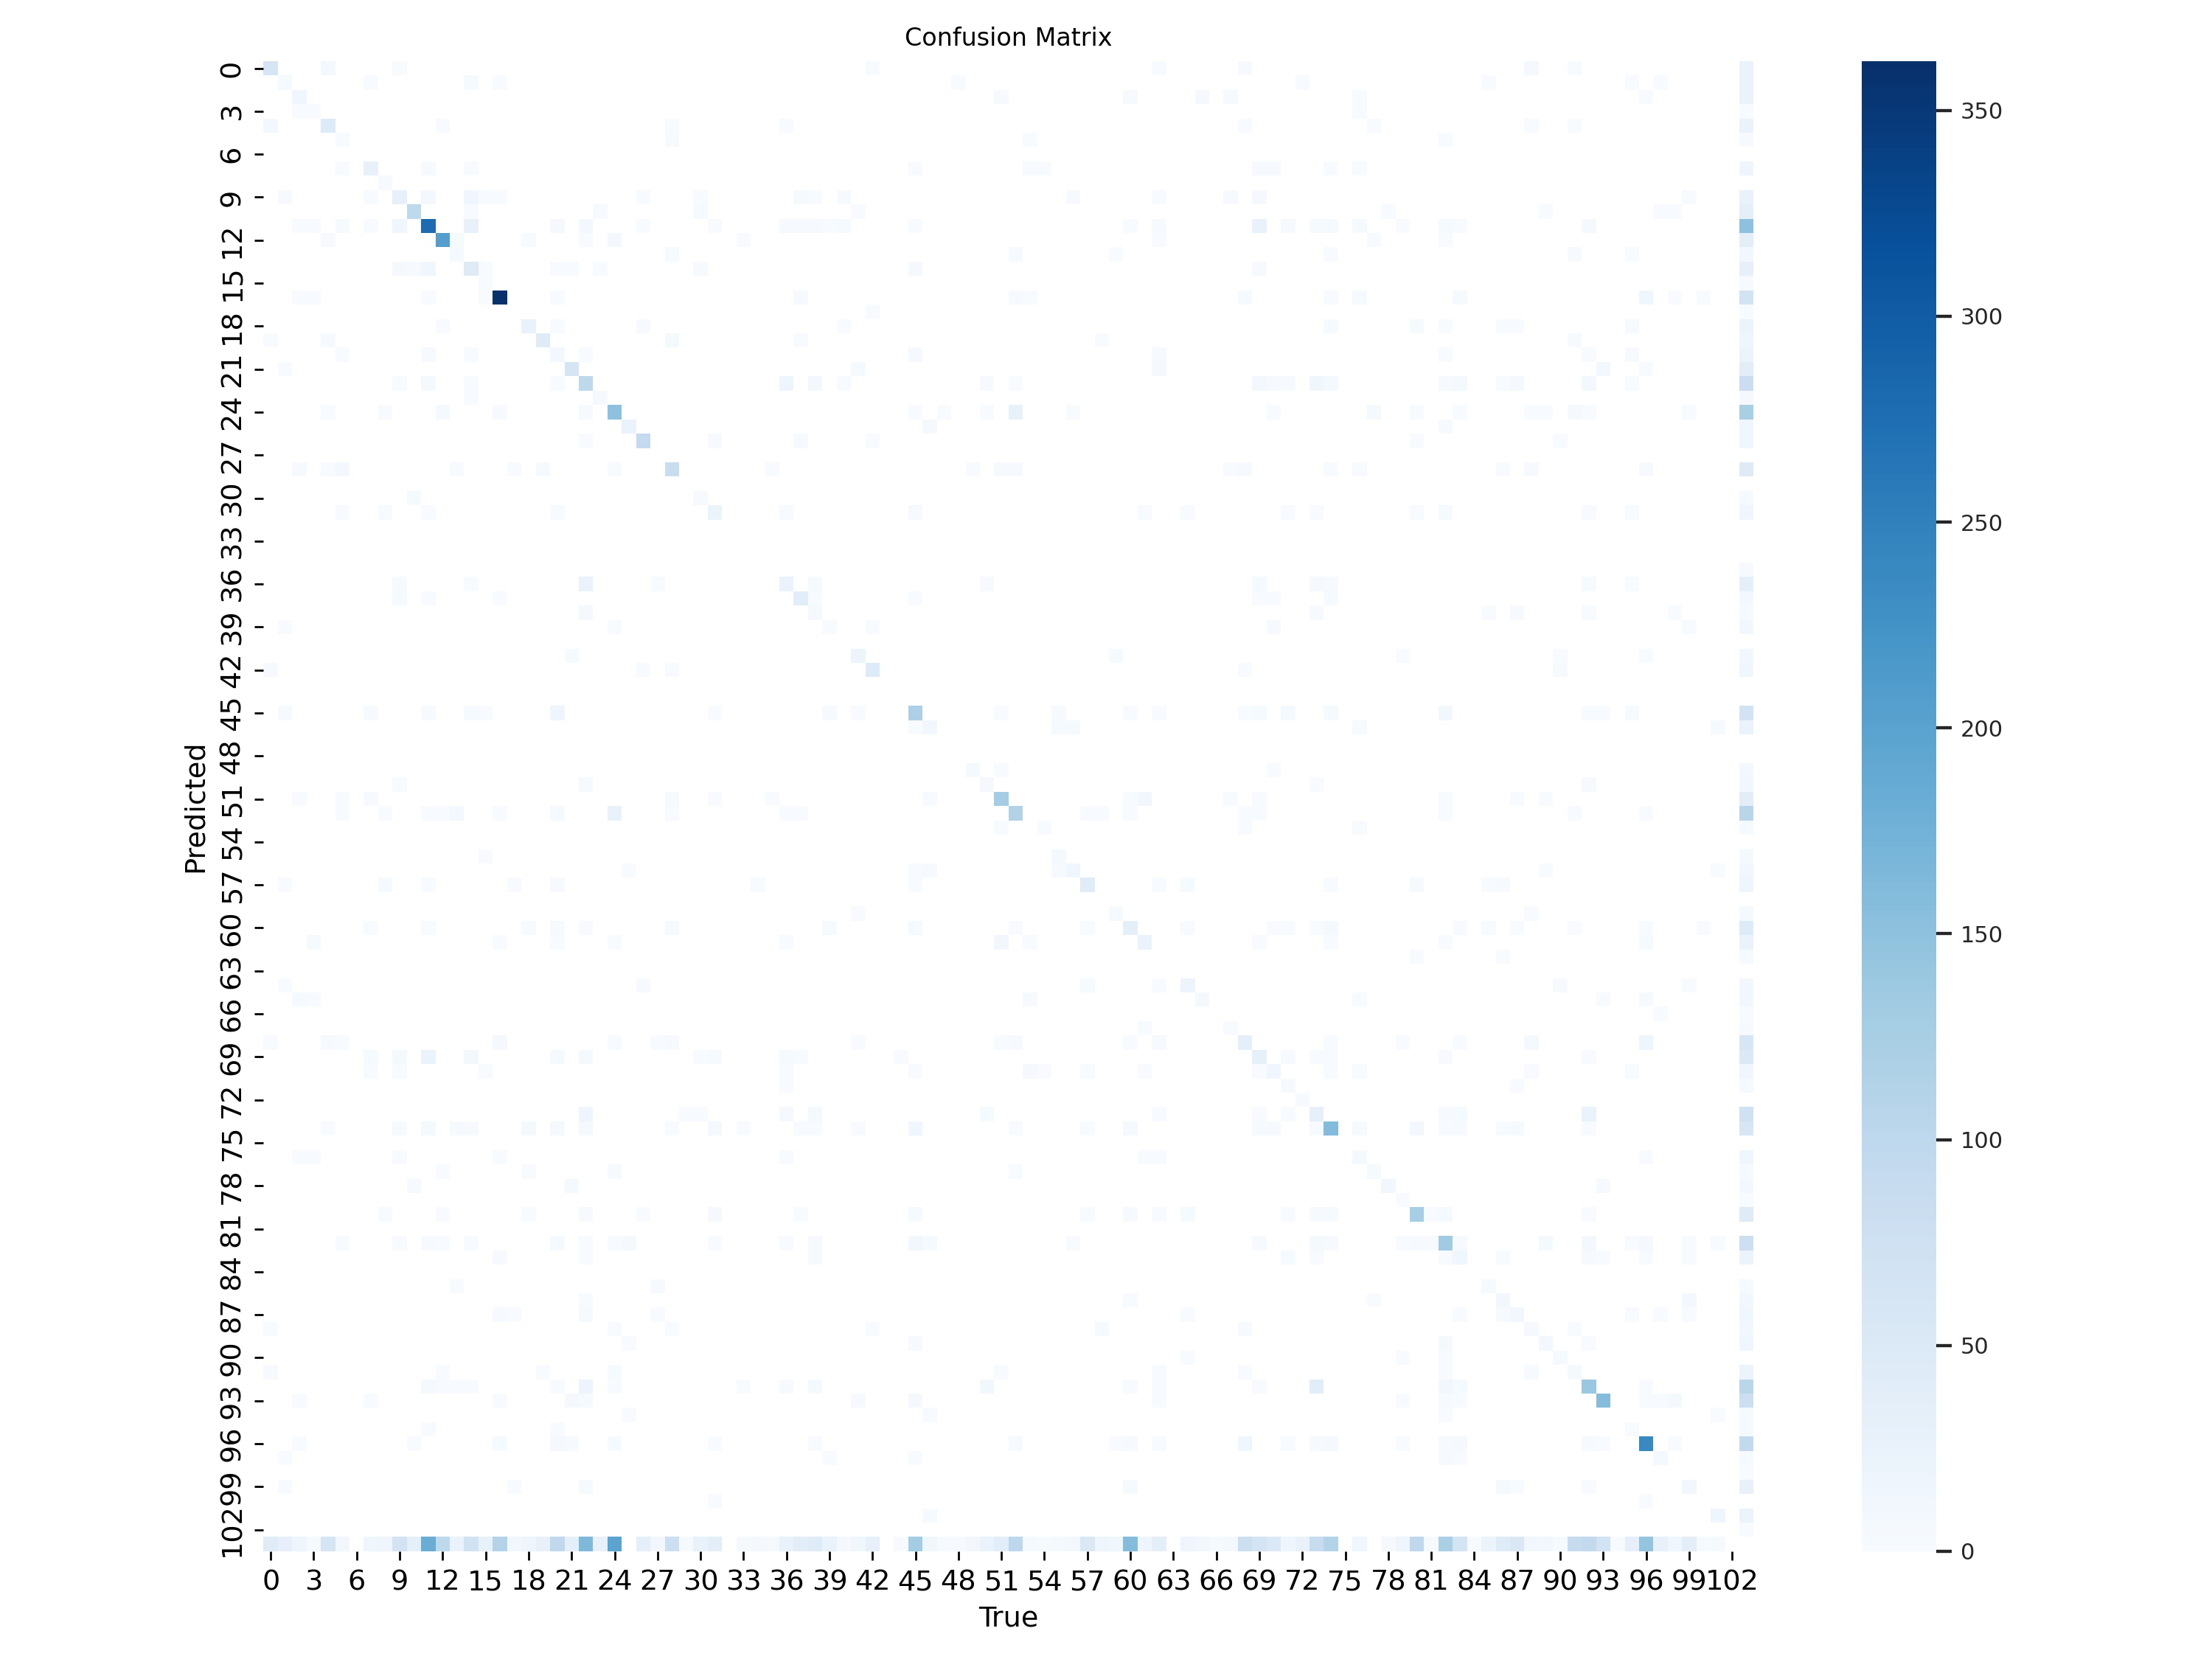

In [7]:
display(Image(filename=f'/kaggle/working/runs/segment/train2/confusion_matrix.png',width=1000))

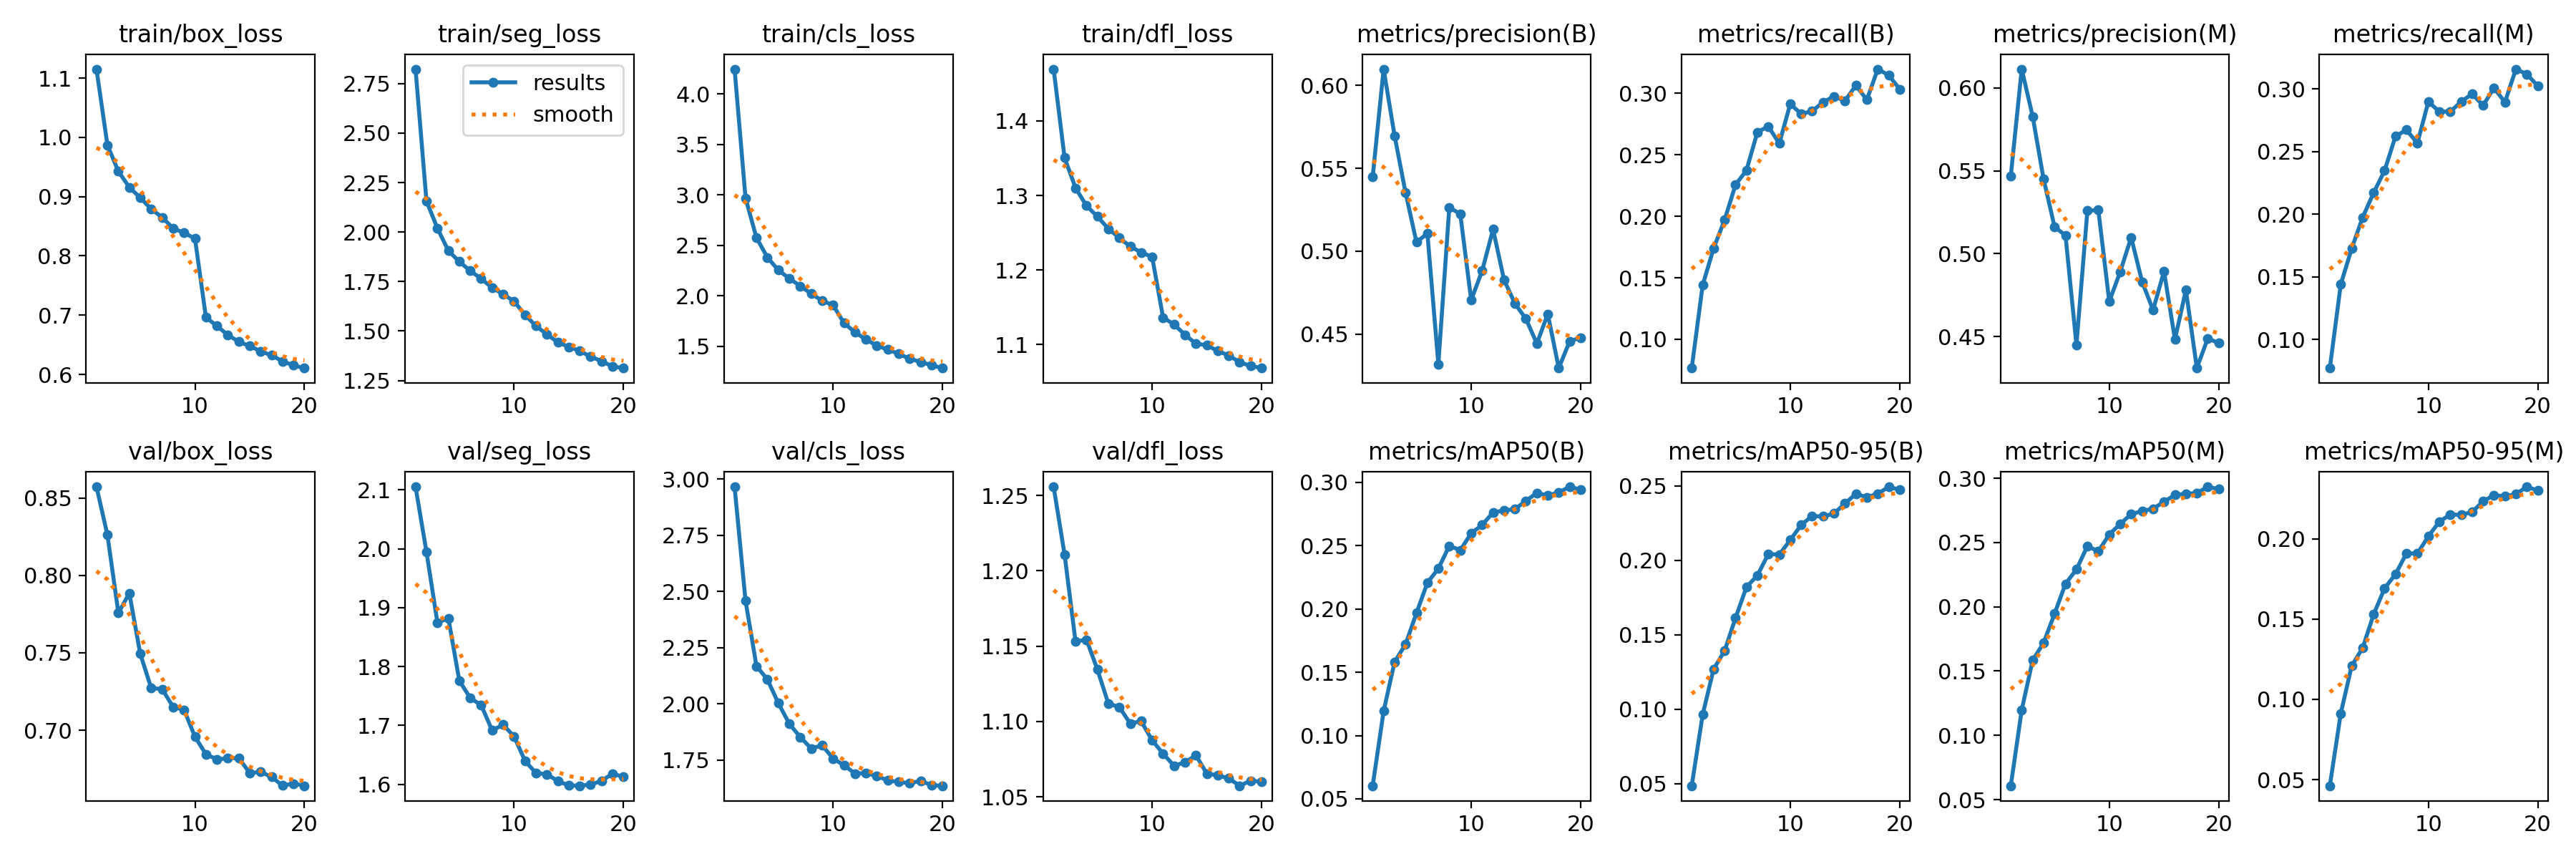

In [8]:
display(Image(filename=f'/kaggle/working/runs/segment/train2/results.png',width=1000))

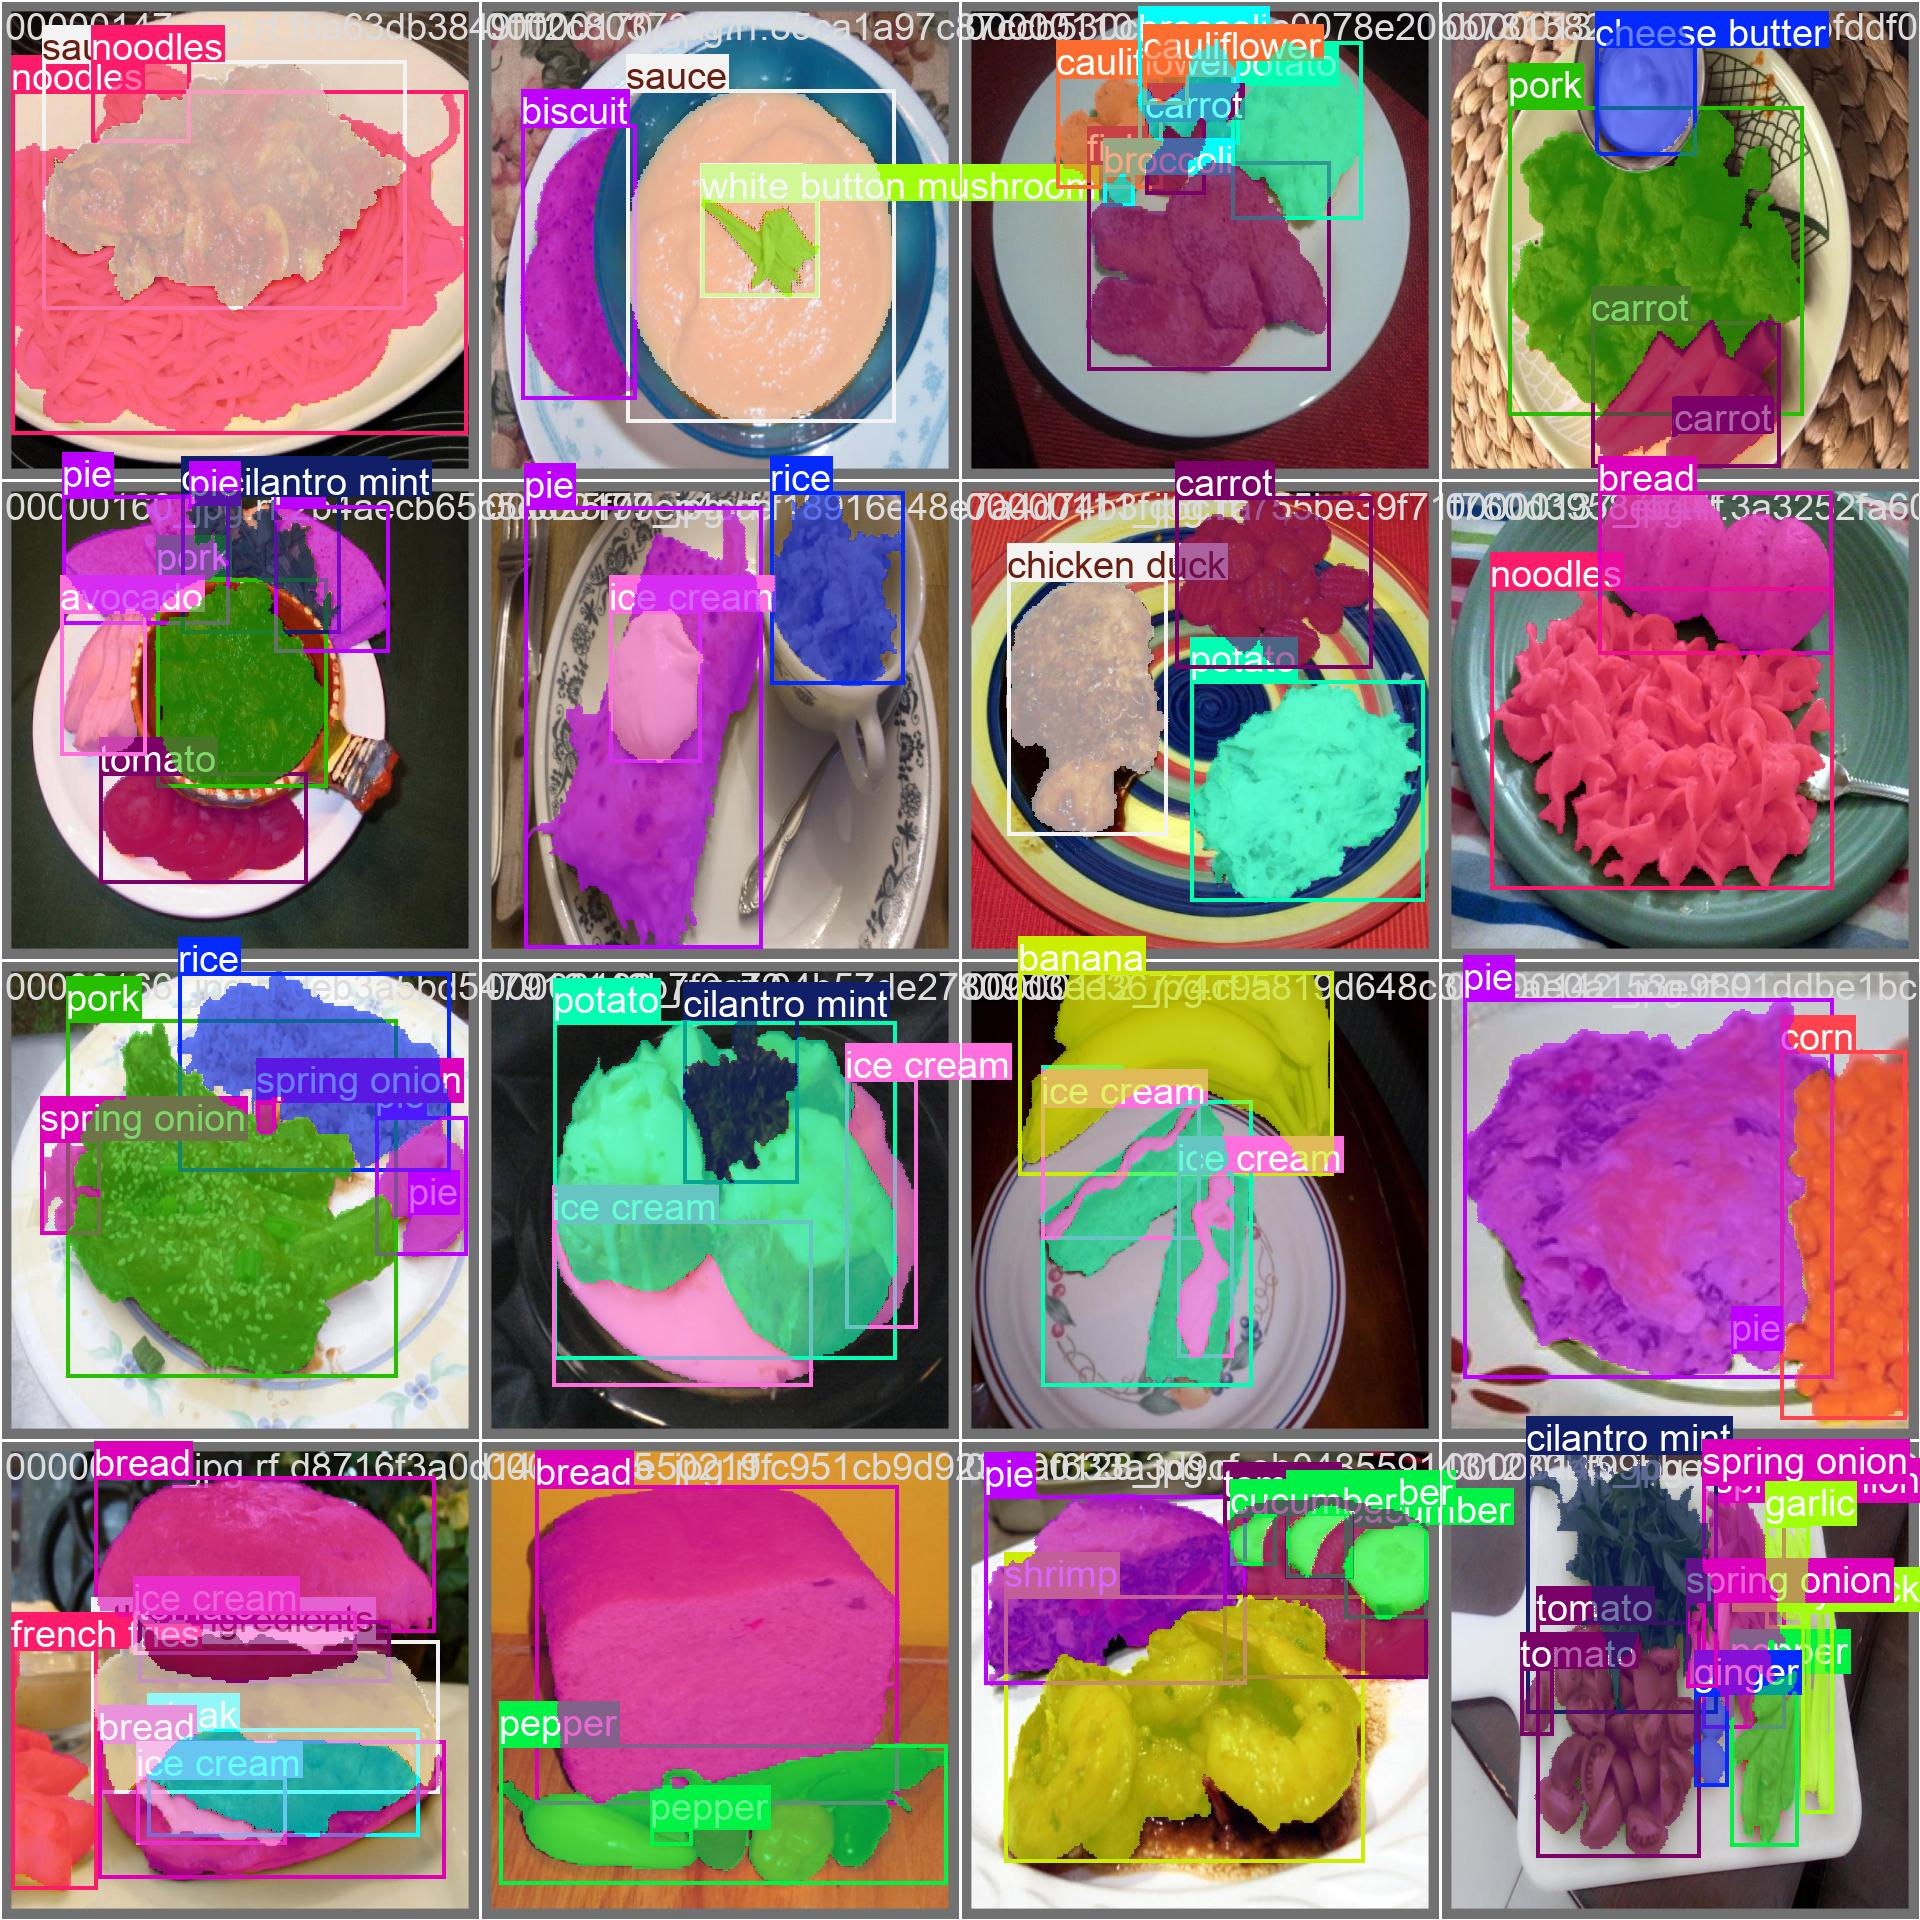

In [9]:
display(Image(filename=f'/kaggle/working/runs/segment/train2/val_batch1_labels.jpg',width=1000))

In [10]:
!yolo task=segment mode=predict model=/kaggle/working/runs/segment/train2/weights/best.pt imgsz=640 conf=0.5 source=/kaggle/working/Food_isntance_segmentation_104-1/test/images

Ultralytics 8.3.39 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11s-seg summary (fused): 265 layers, 10,106,677 parameters, 0 gradients, 35.5 GFLOPs

image 1/709 /kaggle/working/Food_isntance_segmentation_104-1/test/images/00000004_jpg.rf.3982888661b2a10647294a7d7f7c7331.jpg: 640x640 1 French beans, 1 broccoli, 1 carrot, 11.0ms
image 2/709 /kaggle/working/Food_isntance_segmentation_104-1/test/images/00000019_jpg.rf.7b140aa652295f2e9e6597cccb0e69b2.jpg: 640x640 1 egg, 3 peppers, 2 sauces, 1 sausage, 11.0ms
image 3/709 /kaggle/working/Food_isntance_segmentation_104-1/test/images/00000028_jpg.rf.2ce97cb8caa11bb962159421422224cd.jpg: 640x640 1 asparagus, 1 broccoli, 1 carrot, 1 potato, 11.0ms
image 4/709 /kaggle/working/Food_isntance_segmentation_104-1/test/images/00000031_jpg.rf.531360c5414b6f723f570a2d6fd82623.jpg: 640x640 1 cilantro mint, 2 lettuces, 1 tomato, 11.0ms
image 5/709 /kaggle/working/Food_isntance_segmentation_104-1/test/images/00000032_jpg.rf.d4a2

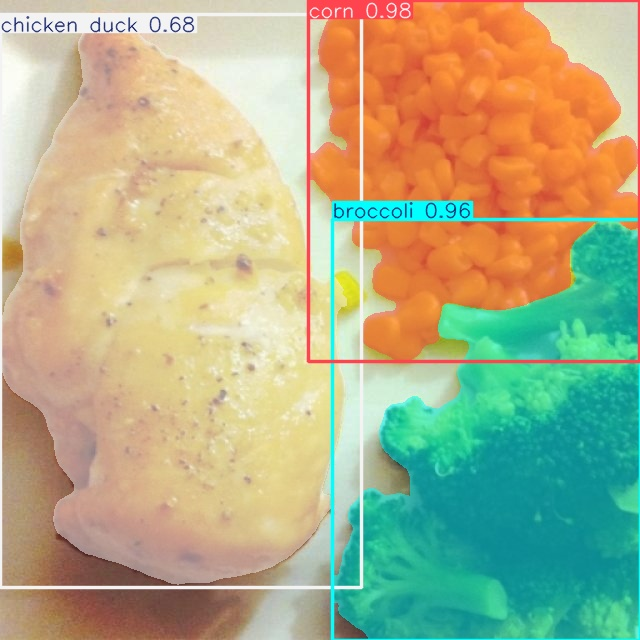

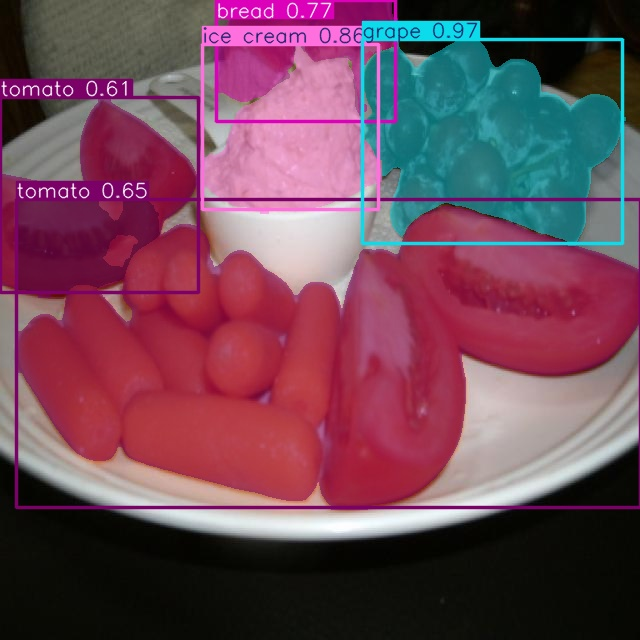

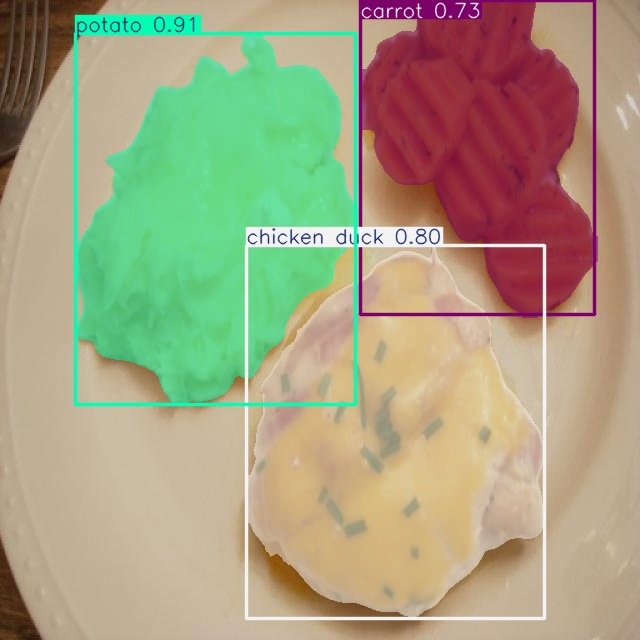

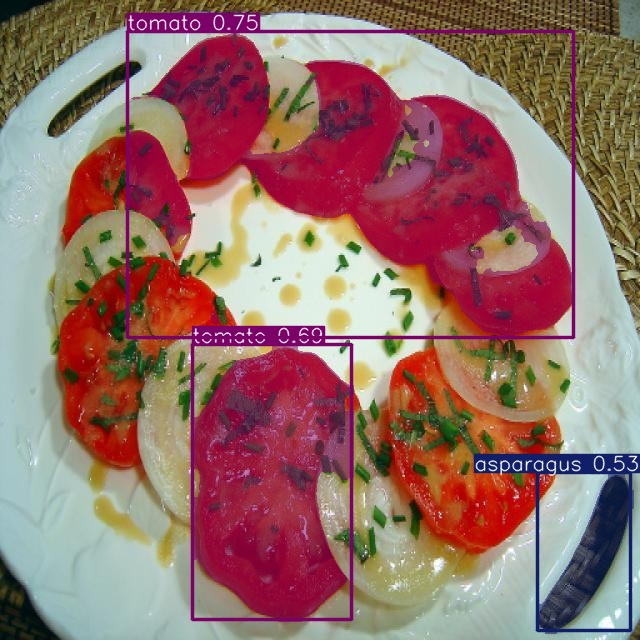

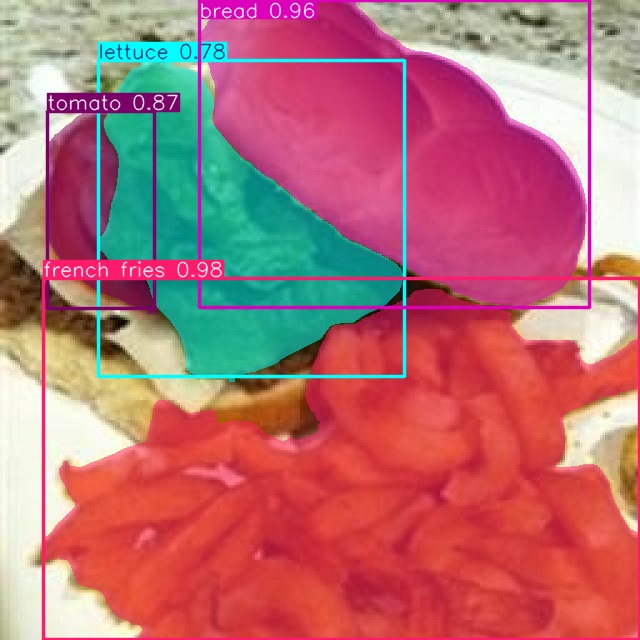

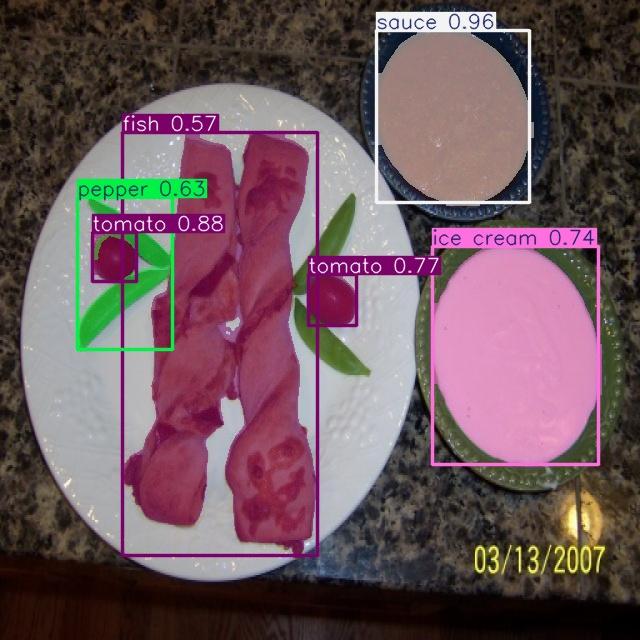

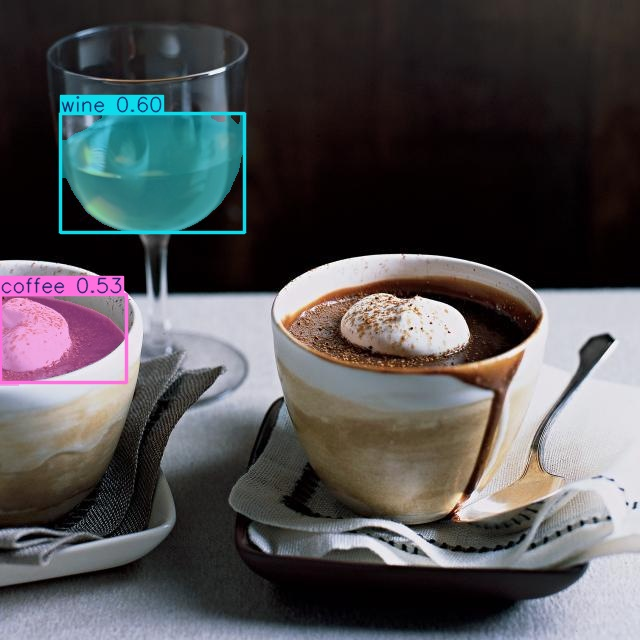

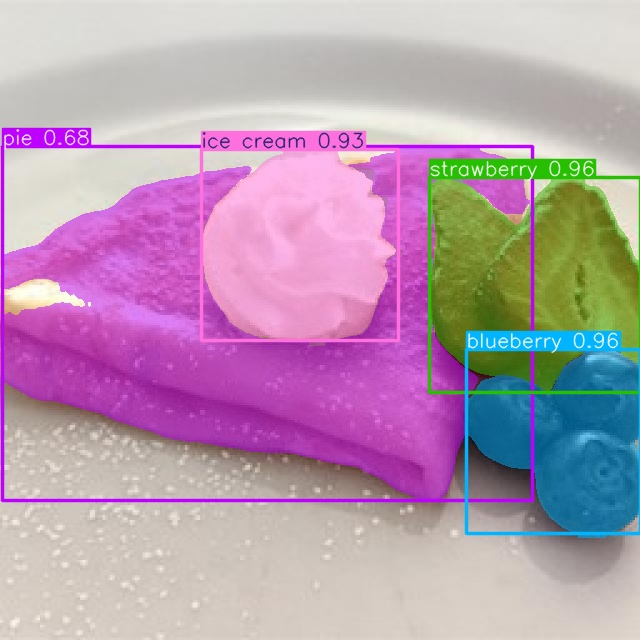

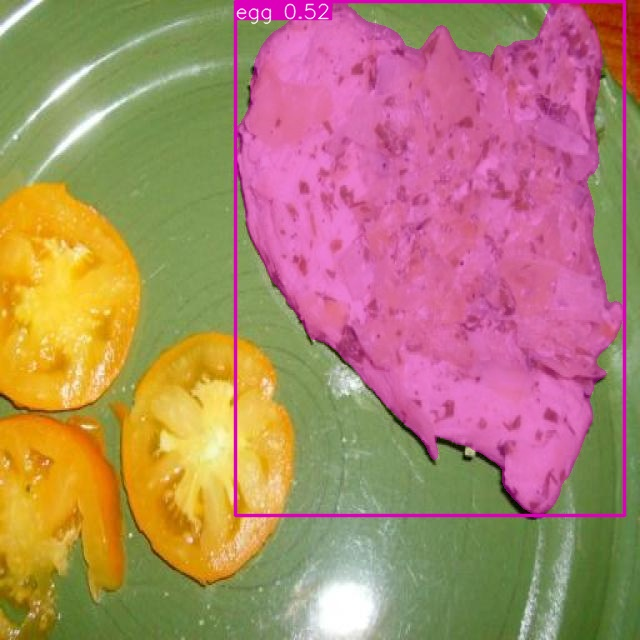

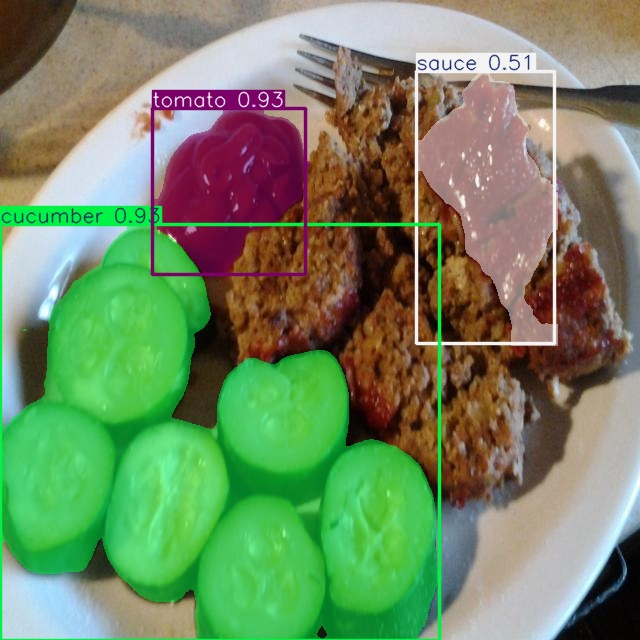

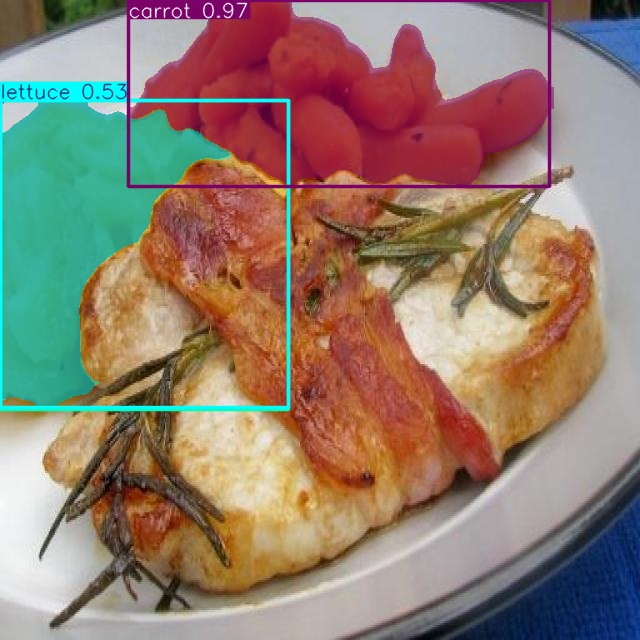

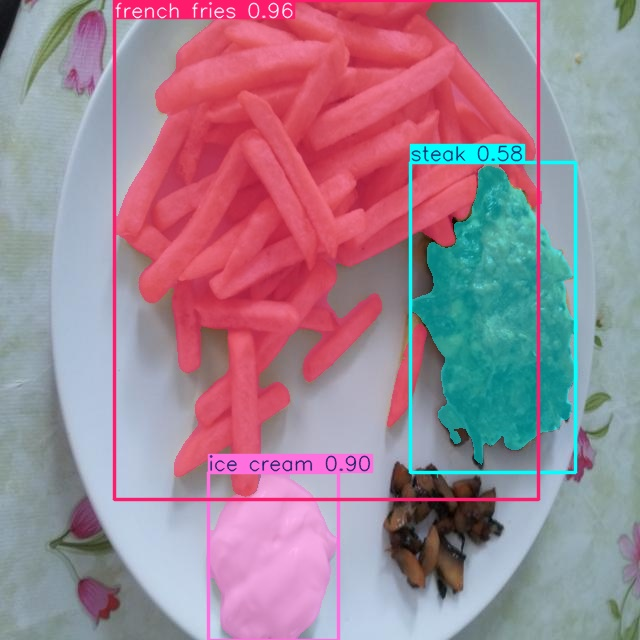

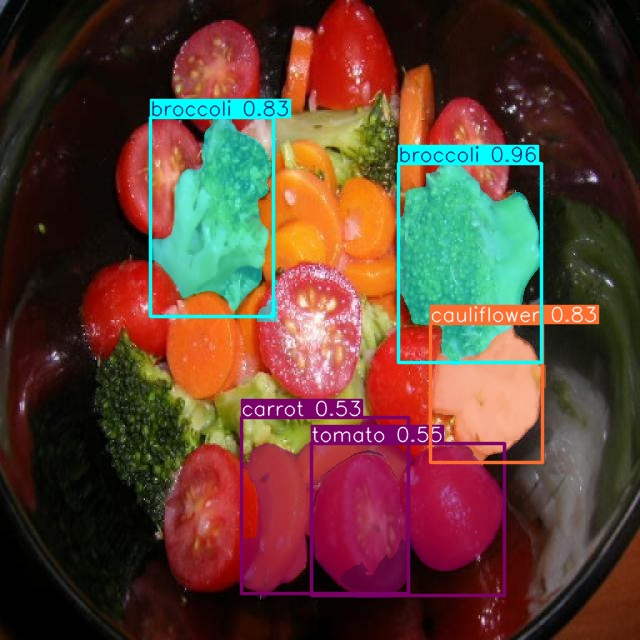

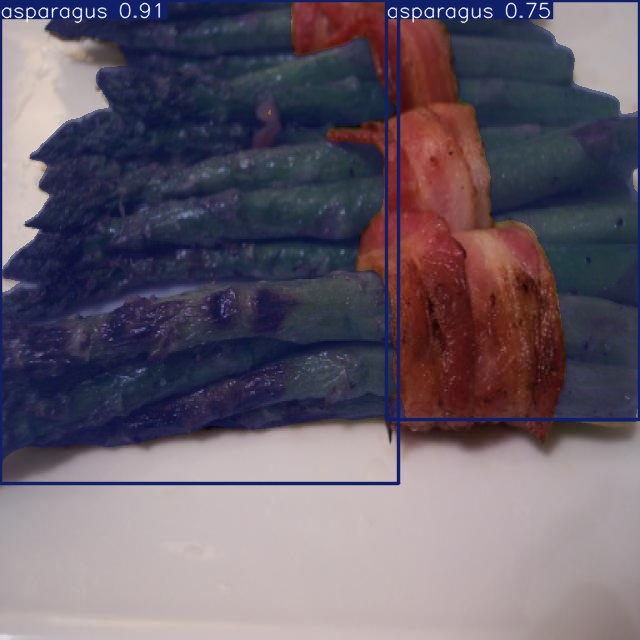

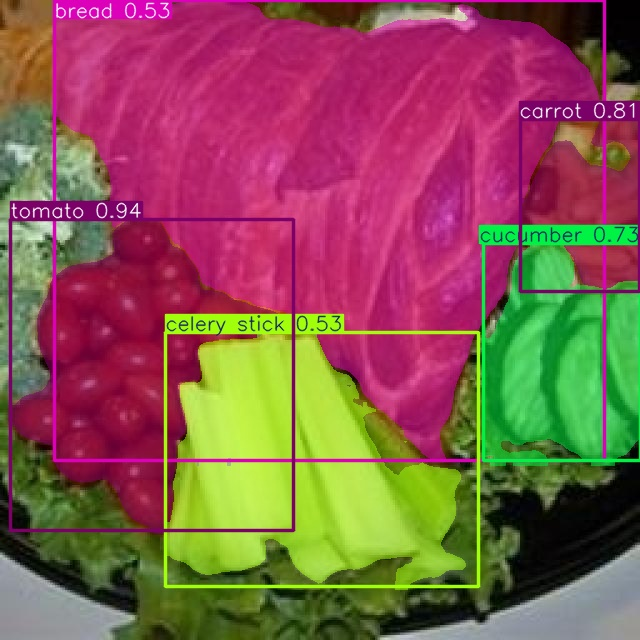

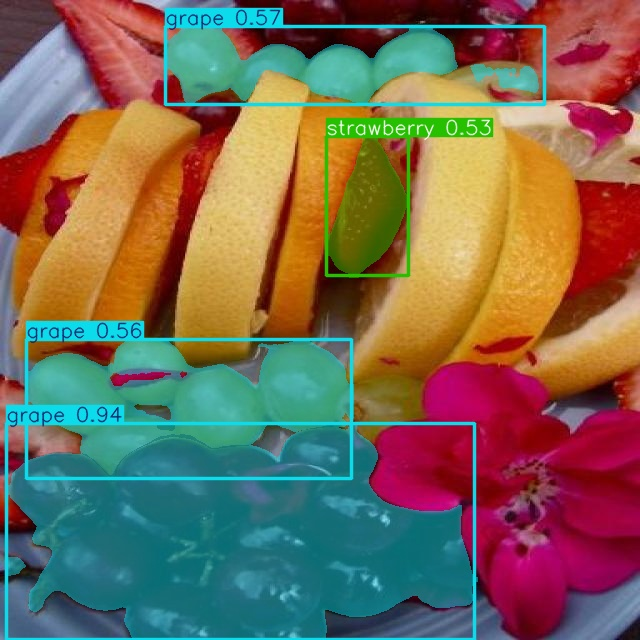

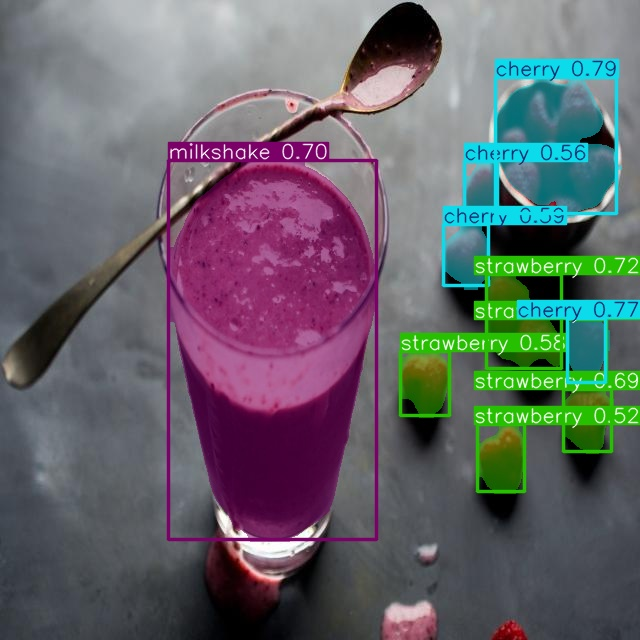

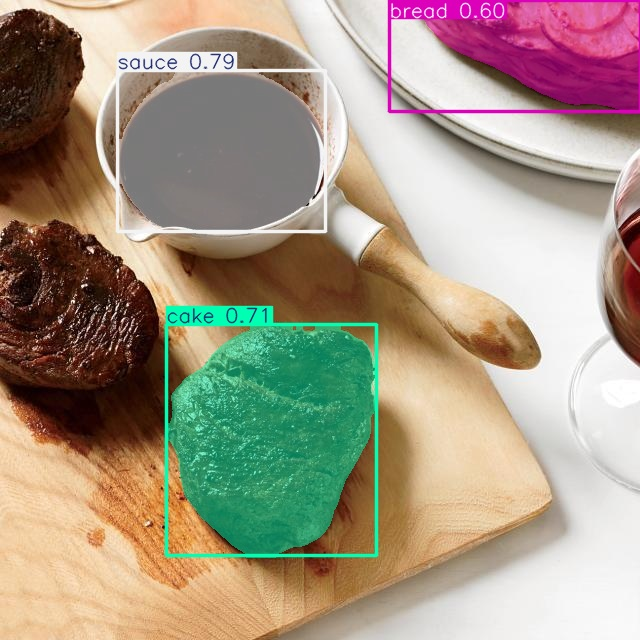

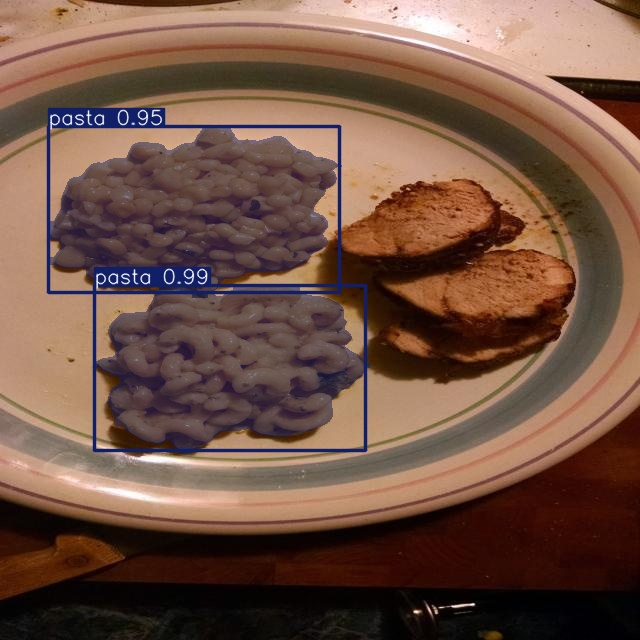

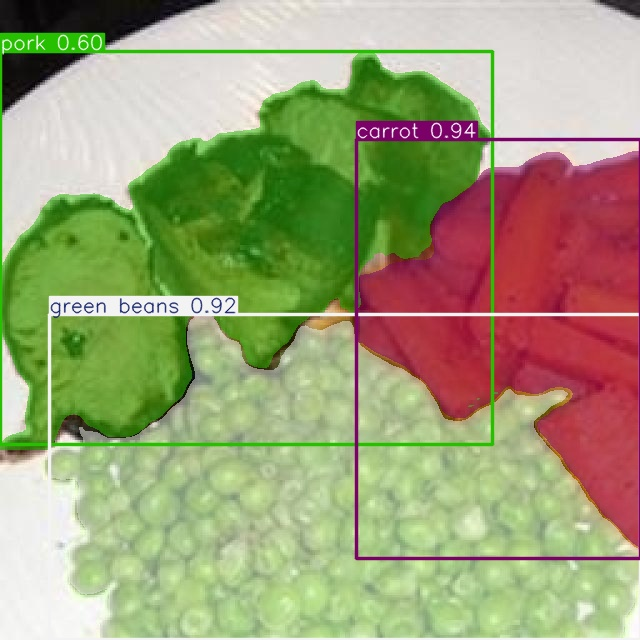

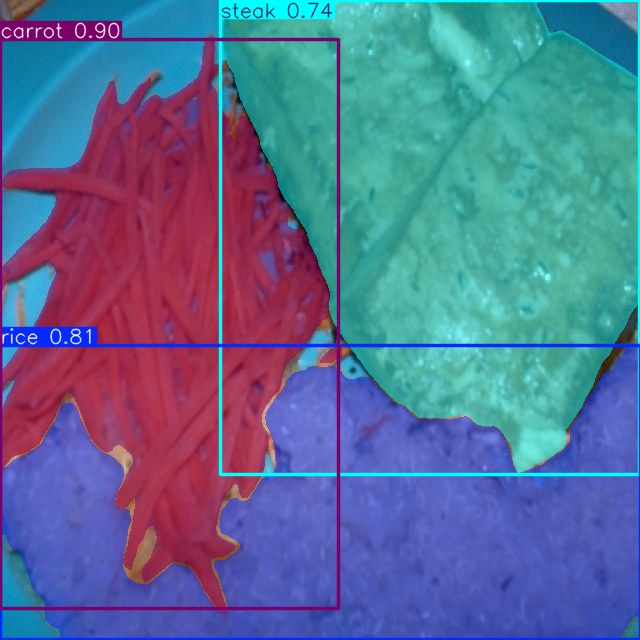

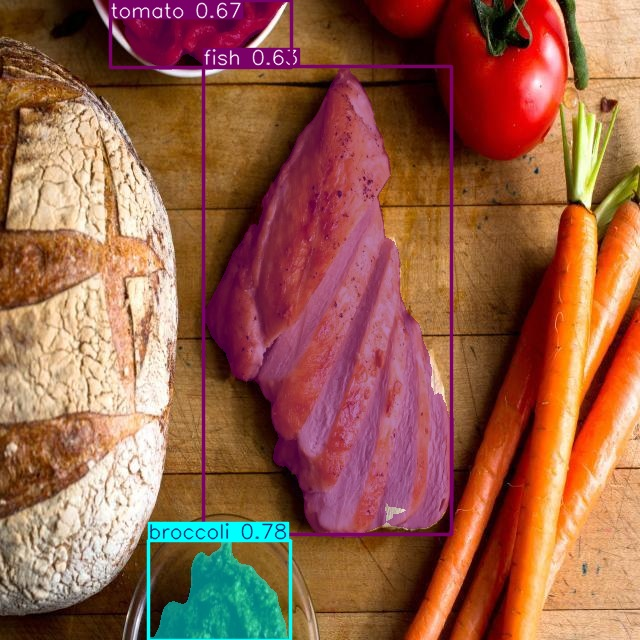

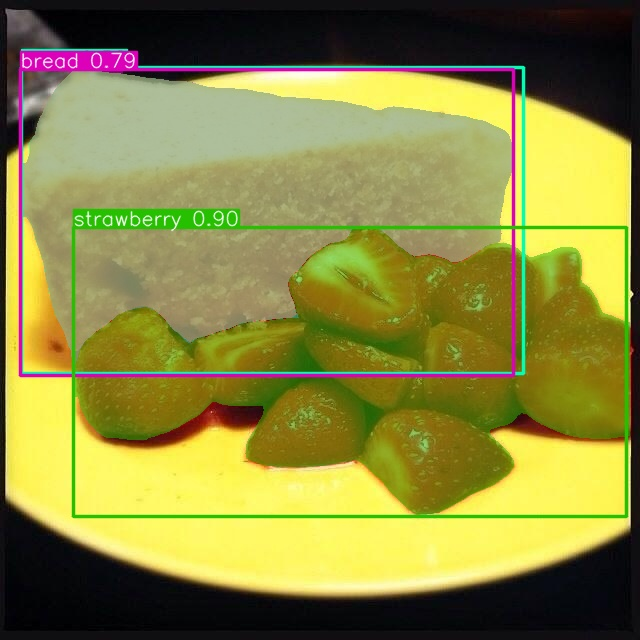

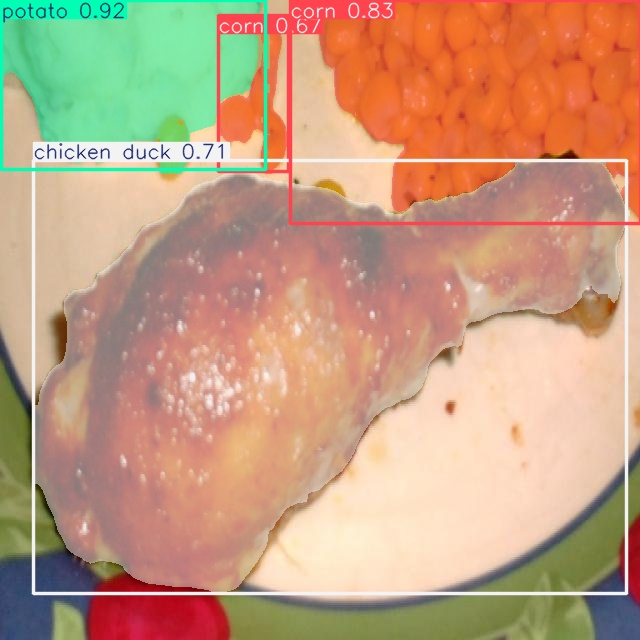

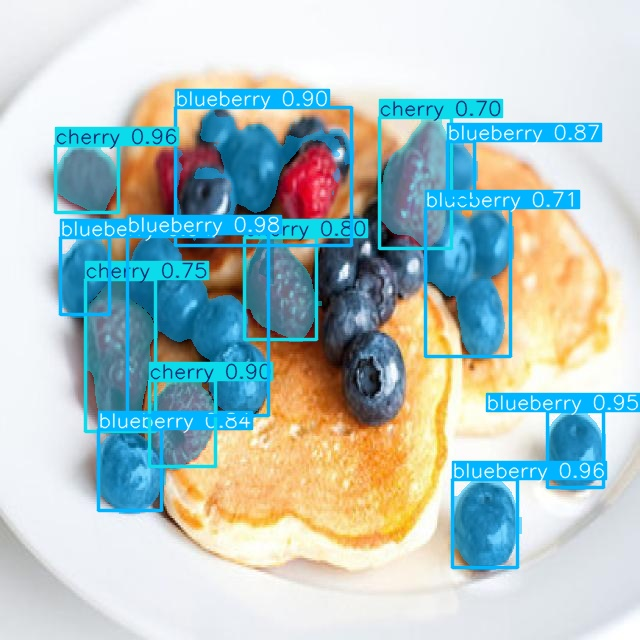

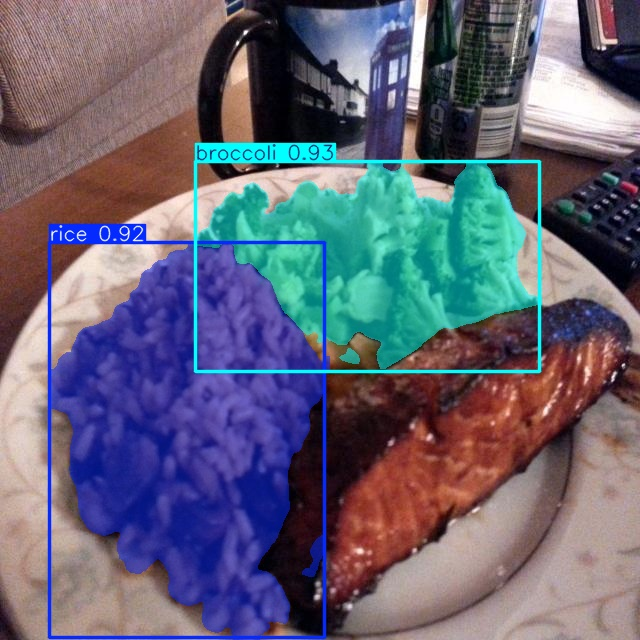

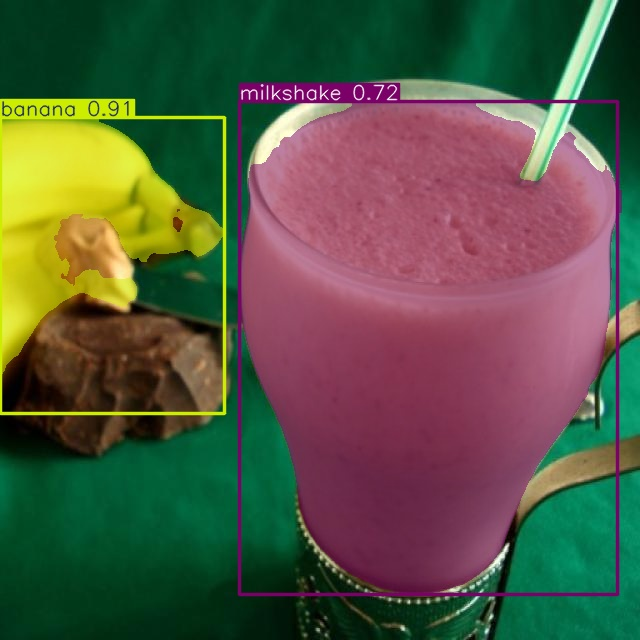

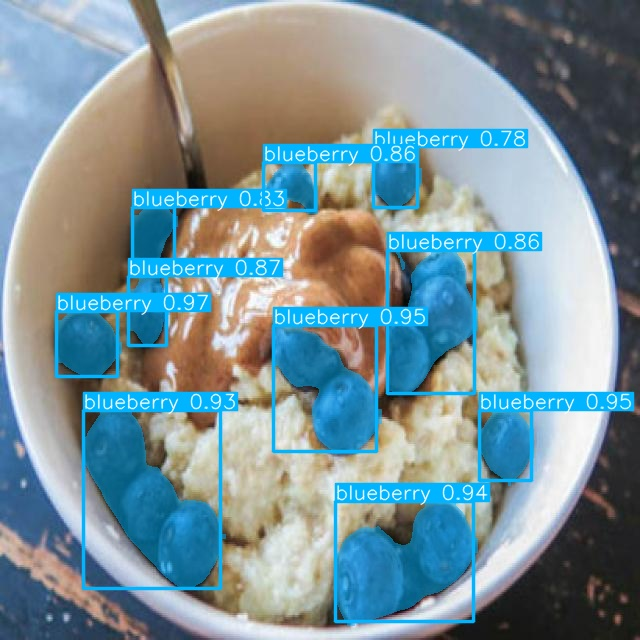

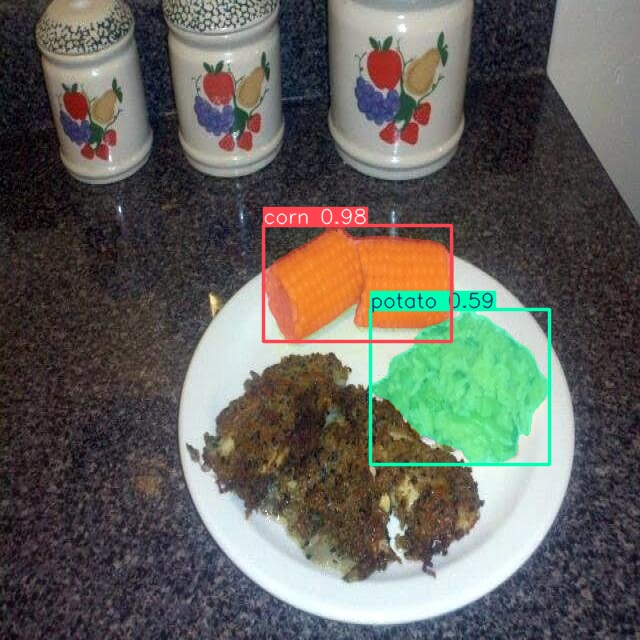

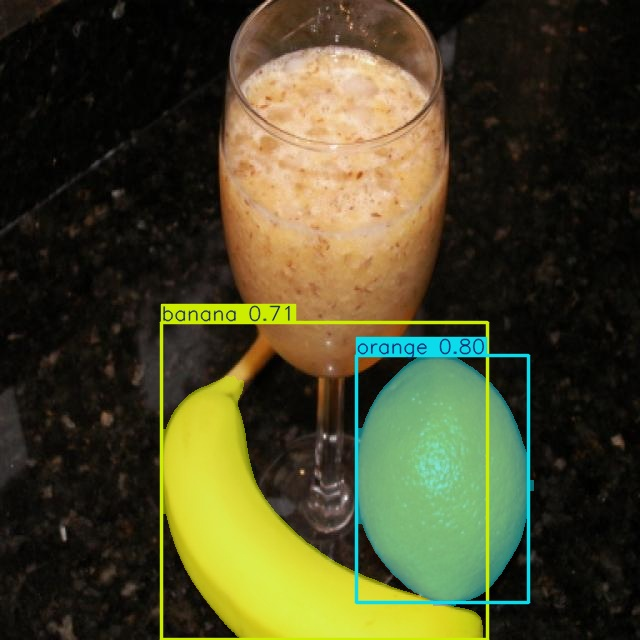

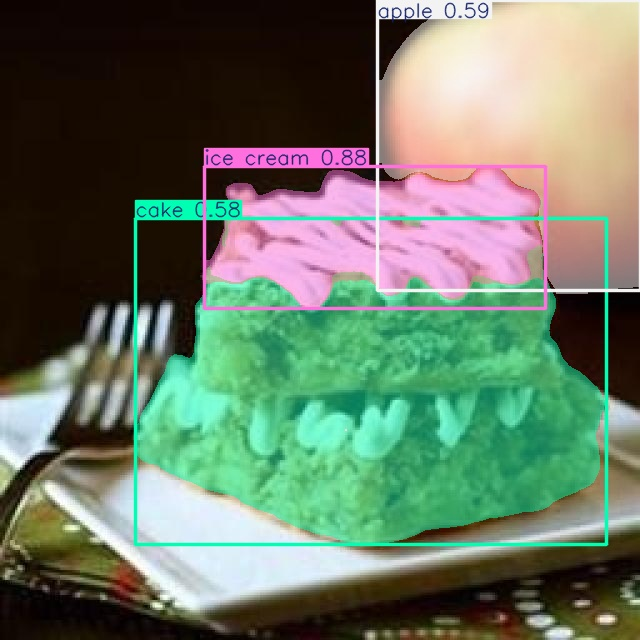

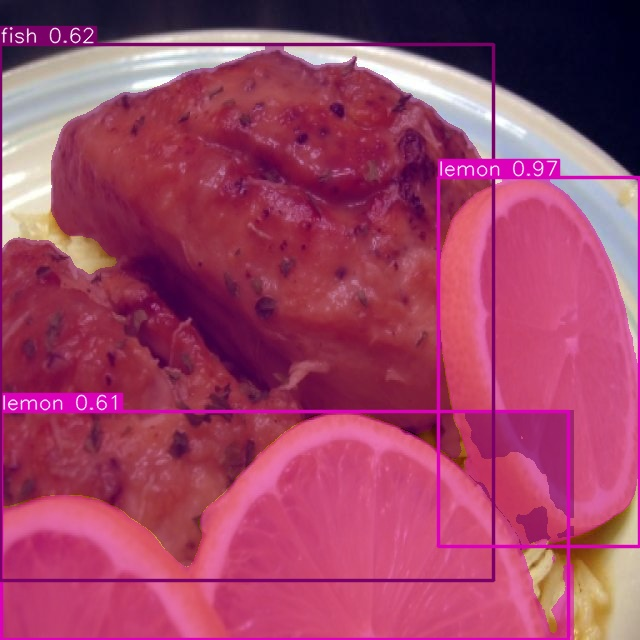

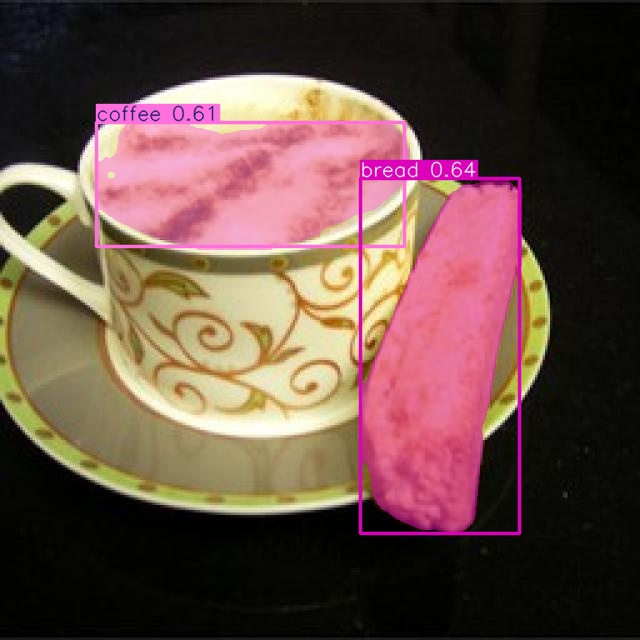

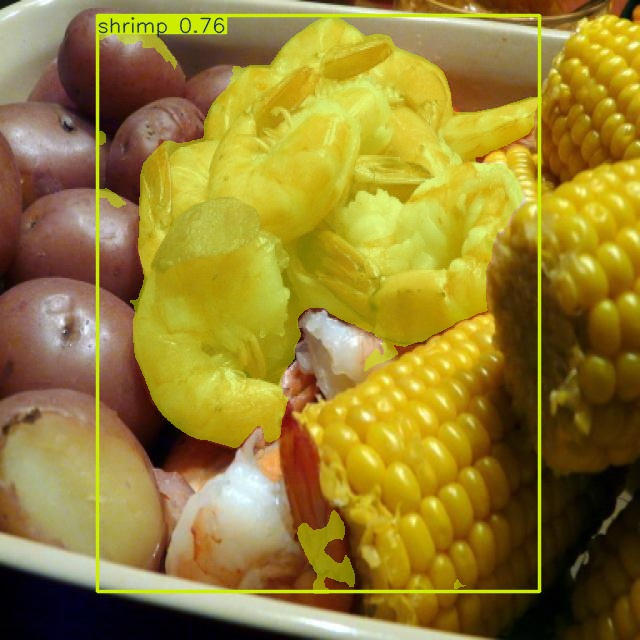

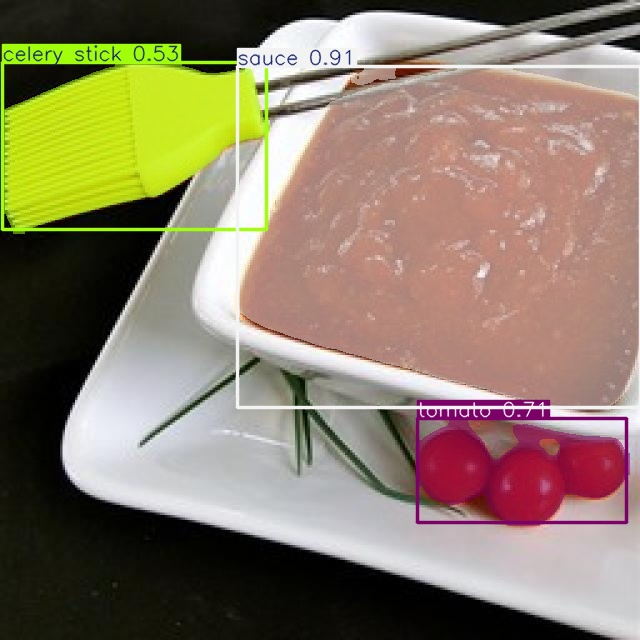

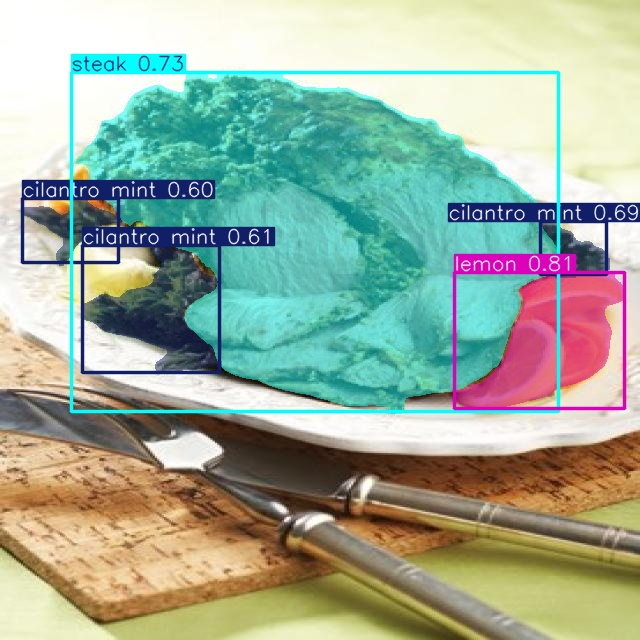

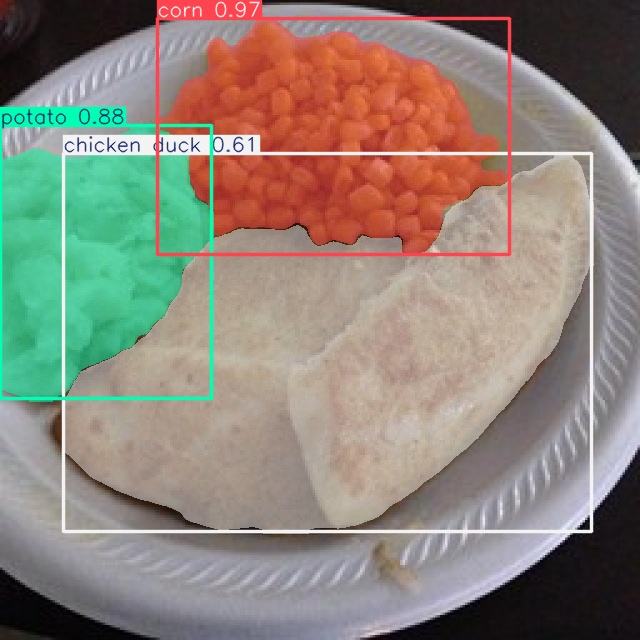

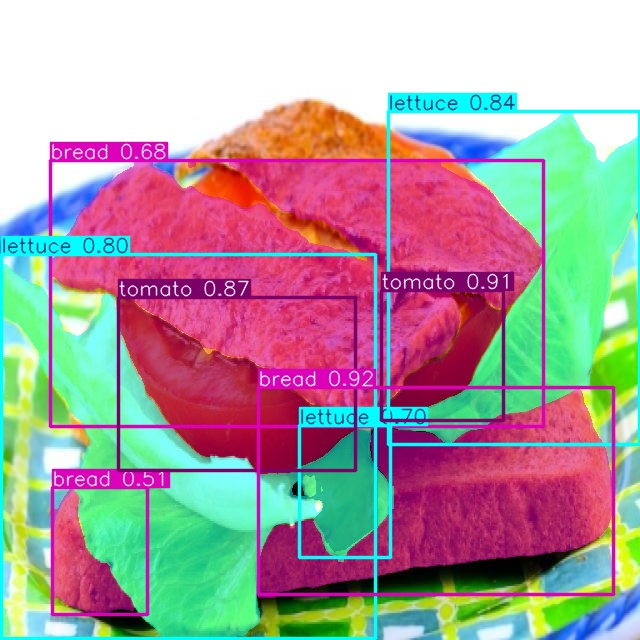

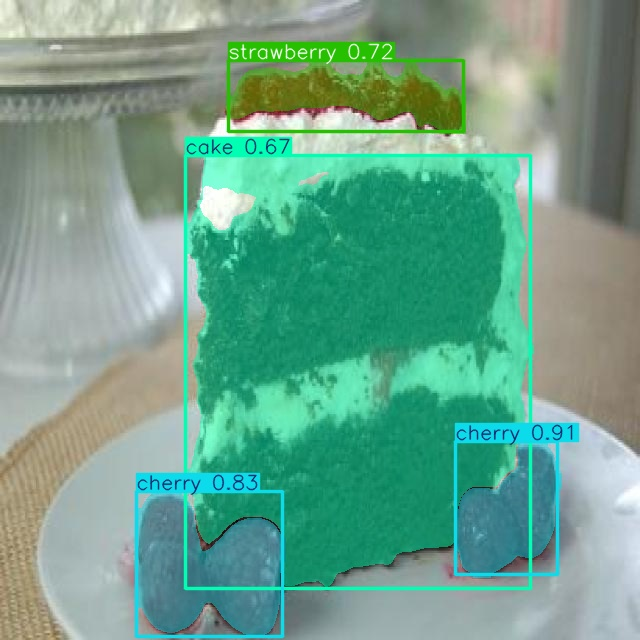

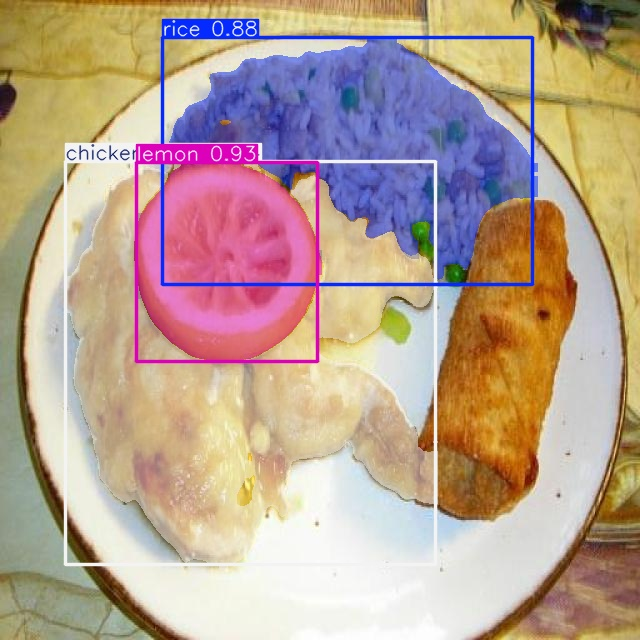

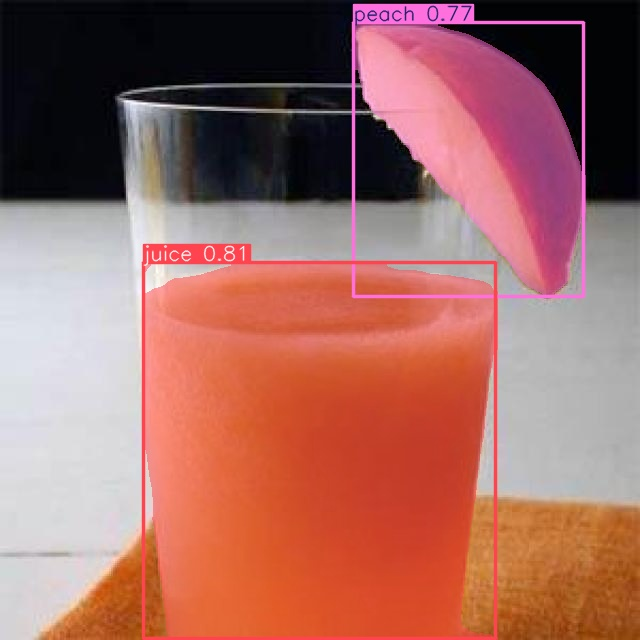

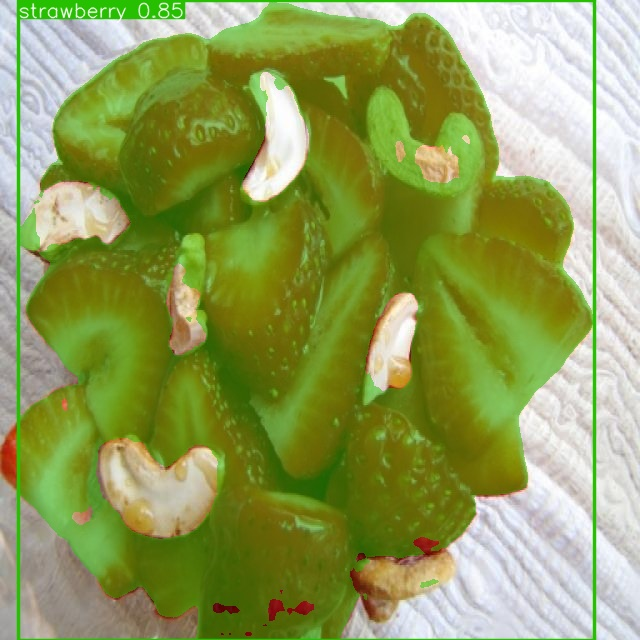

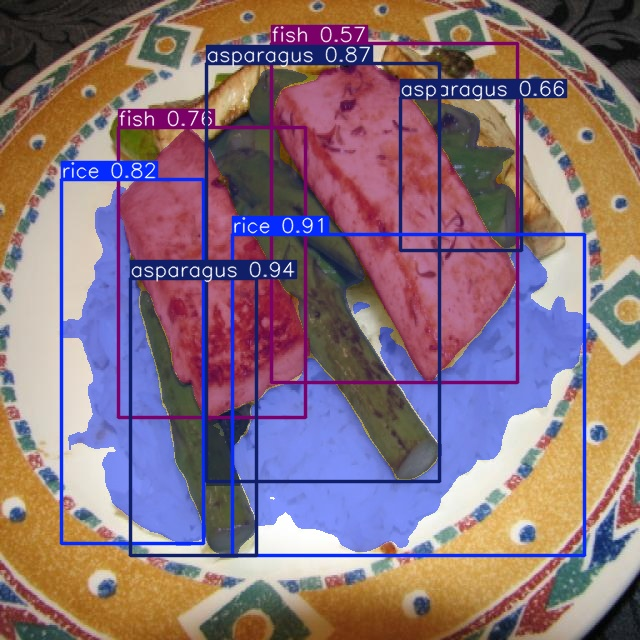

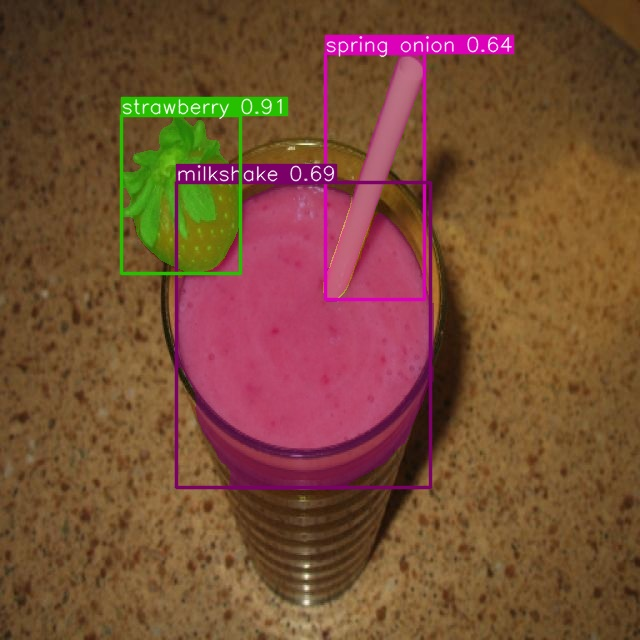

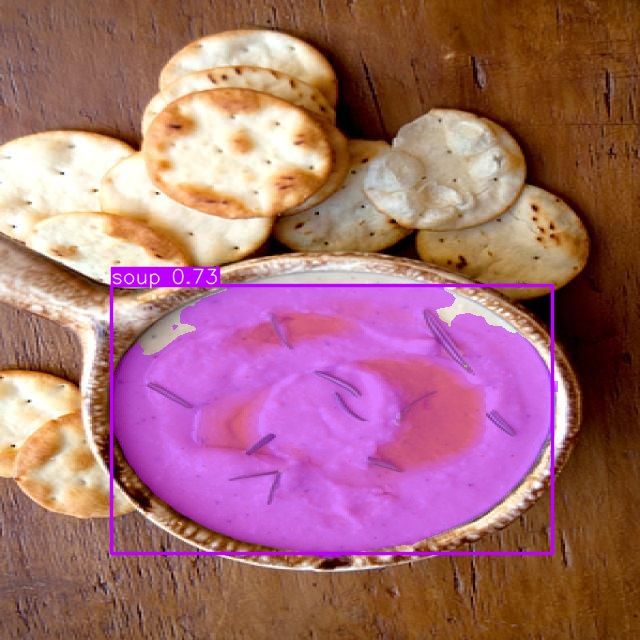

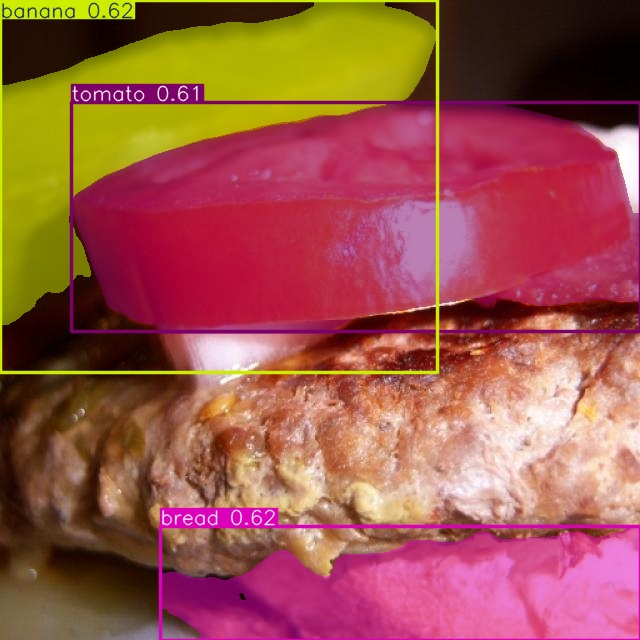

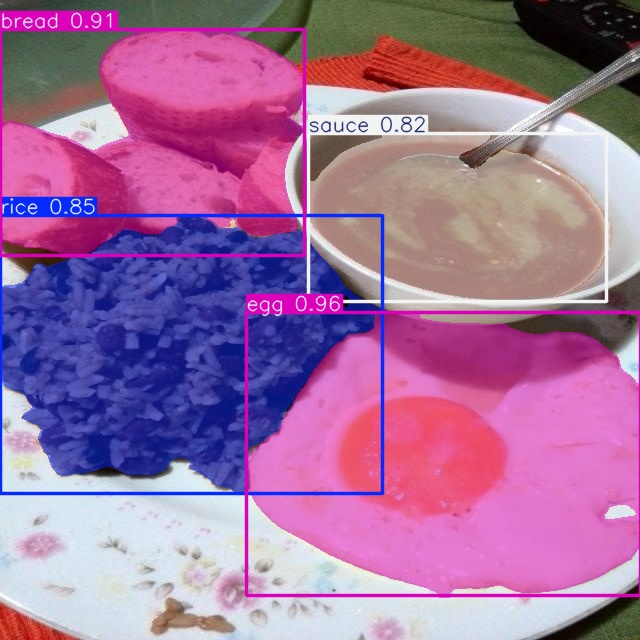

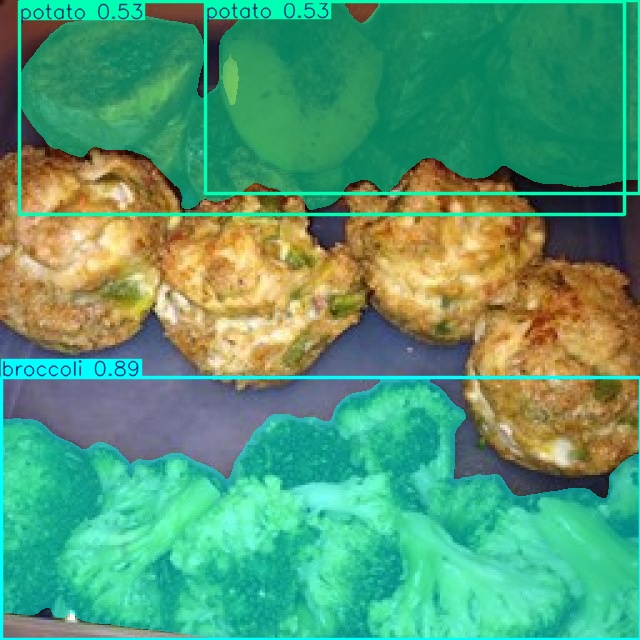

In [11]:
import glob
i=0
for image_name in glob.glob("/kaggle/working/runs/segment/predict/*.jpg"):
    if i % 15 == 0 :
        print("\n")
        display(Image(filename=image_name))
    i+=1